<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [70]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    total_sum = 0
    for i in range(X.shape[0]):
        total_sum += X[i].dot(V[i])
    return total_sum
print('''Ответ для
      1 2   *   2 3  +   4 5 * 1 2
      2 4                5 6  ''')
print(sum_prod(np.array([[[1, 2],[2,4]],[[4,5],[5,6]]]), np.array([[[2],[3]],[[1], [2]]])))

Ответ для
      1 2   *   2 3  +   4 5 * 1 2
      2 4                5 6  
[[22]
 [33]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [36]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)
M = np.array([
    [8, 7, 0],
    [4.6, 0, 5],
    [0.4, 4, 0.5]
])

print(binarize(M))

[[1 1 0]
 [1 0 1]
 [0 1 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [56]:
def unique_rows(mat):
    return [set(map(int,row)) for row in mat]

def unique_columns(mat):
    columns = mat.T
    return [set(map(int,column)) for column in columns]
matrix = np.array([
    [1, 2, 3, 1],
    [4, 5, 2, 2],
    [1, 5, 6, 7]
])

print("Уникальные элементы по строкам:", unique_rows(matrix))
print("Уникальные элементы по столбцам:", unique_columns(matrix))

Уникальные элементы по строкам: [{1, 2, 3}, {2, 4, 5}, {1, 5, 6, 7}]
Уникальные элементы по столбцам: [{1, 4}, {2, 5}, {2, 3, 6}, {1, 2, 7}]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

[[-0.98745652 -0.91896808  1.48255204]
 [-0.93735223  0.07480585  2.39968138]
 [ 1.14114587 -1.70234842 -0.83520313]
 [-0.02670711 -1.32130472  0.00501009]]
Математическое ожидание по строкам: [-0.14129086  0.51237833 -0.46546856 -0.44766725]
Математическое ожидание по столбцам: [-0.2025925  -0.96695384  0.76301009]
Дисперсия по строкам: [1.31921465 1.95170039 1.41592846 0.38178888]
Дисперсия по столбцам: [0.74811297 0.4384839  1.58132076]


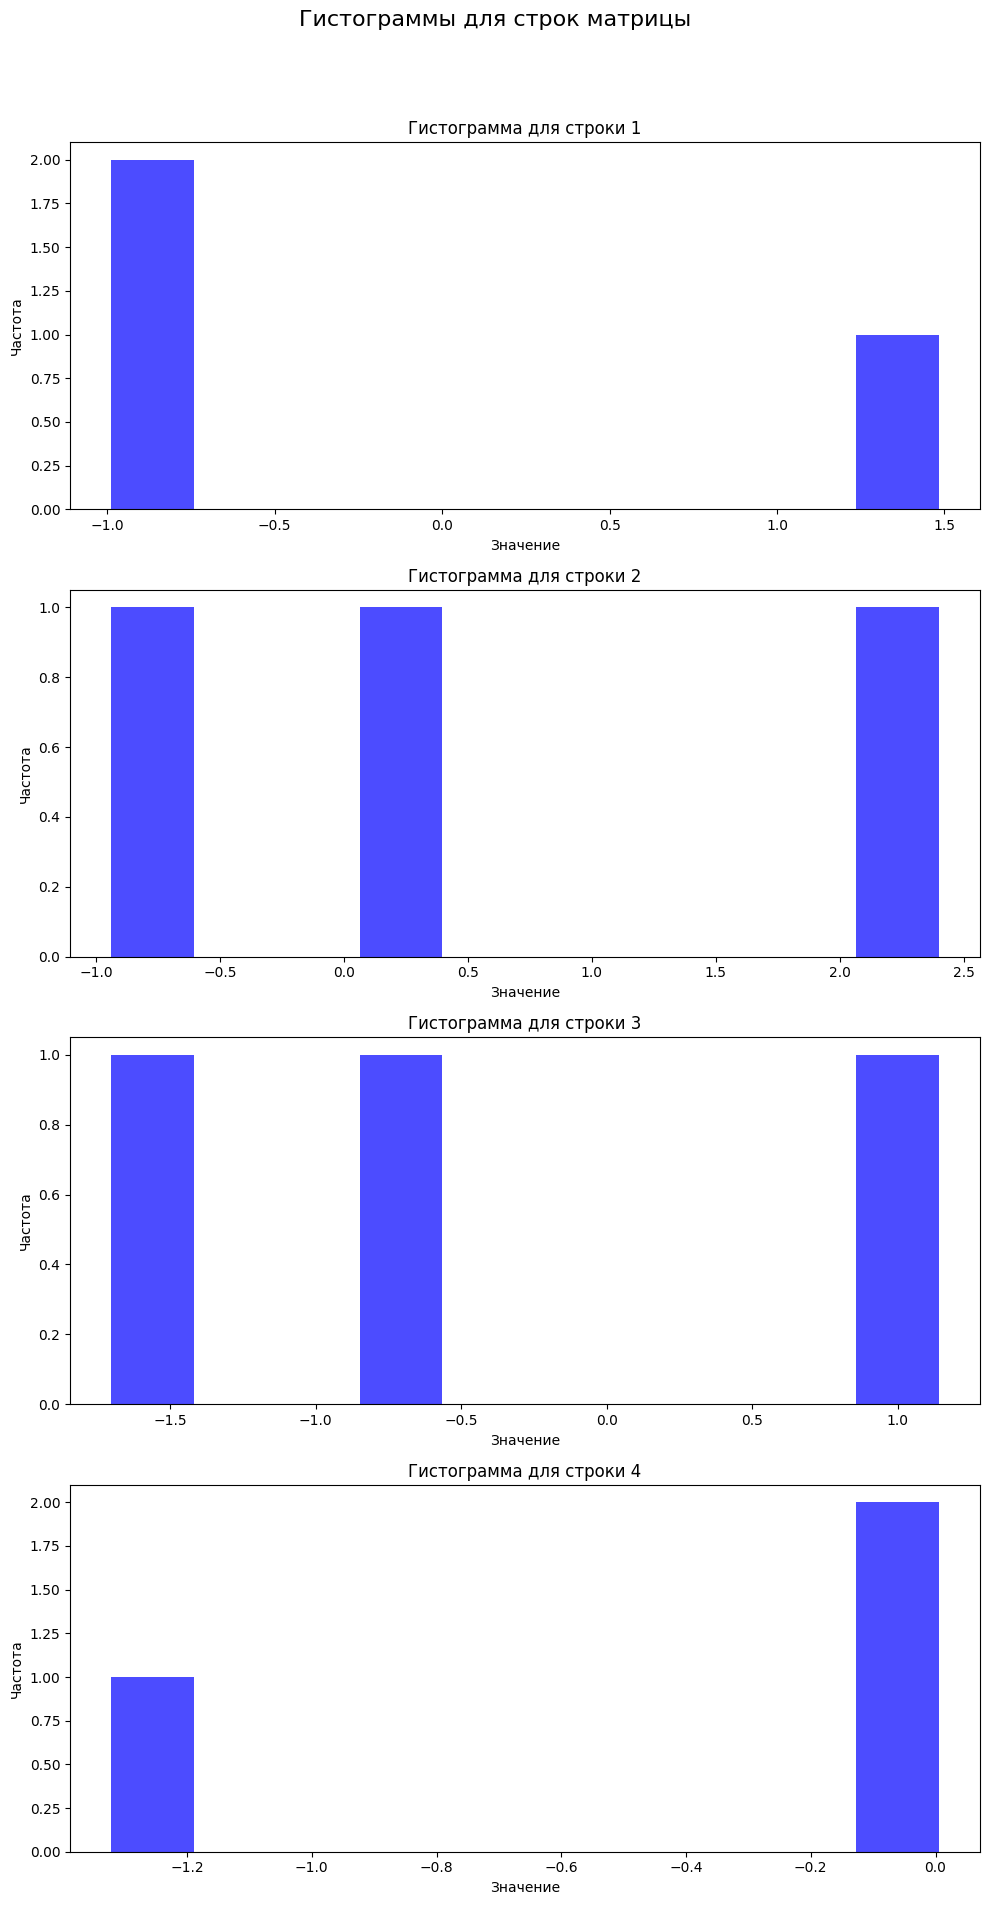

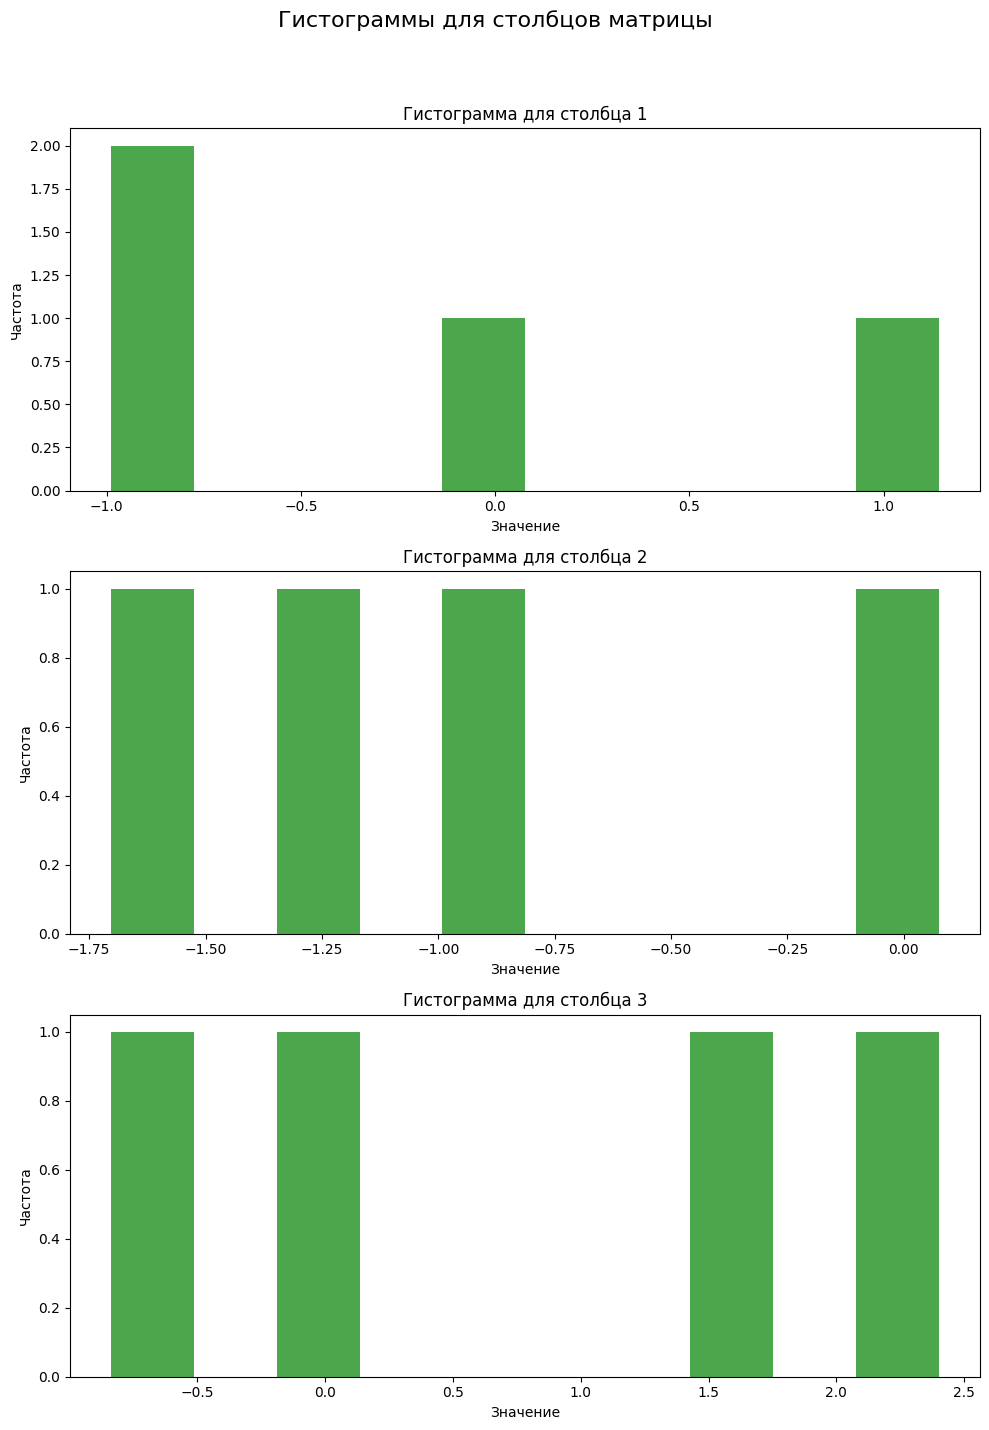

In [84]:
def generate_matrix_and_analyze(m, n):
    matrix = np.random.randn(m, n)
    print(matrix)
    row_means = np.mean(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    row_variances = np.var(matrix, axis=1)
    col_variances = np.var(matrix, axis=0)
    print("Математическое ожидание по строкам:", row_means)
    print("Математическое ожидание по столбцам:", col_means)
    print("Дисперсия по строкам:", row_variances)
    print("Дисперсия по столбцам:", col_variances)
    fig, axes = plt.subplots(m, 1, figsize=(10,5*m))
    fig.suptitle('Гистограммы для строк матрицы', fontsize=16)

    for i in range(m):
        axes[i].hist(matrix[i], bins=10, alpha=0.7, color='blue')
        axes[i].set_title(f'Гистограмма для строки {i + 1}')
        axes[i].set_xlabel('Значение')
        axes[i].set_ylabel('Частота')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    fig, axes = plt.subplots(n, 1, figsize=(10, 5*n))
    fig.suptitle('Гистограммы для столбцов матрицы', fontsize=16)

    for j in range(n):
        axes[j].hist(matrix[:, j], bins=10, alpha=0.7, color='green')
        axes[j].set_title(f'Гистограмма для столбца {j + 1}')
        axes[j].set_xlabel('Значение')
        axes[j].set_ylabel('Частота')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Подгонка для заголовка
    plt.show()

generate_matrix_and_analyze(4, 3)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [90]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix
matrix1 = chess(4, 5, 1, 0)
print('Ответ для chess(4, 5, 1, 0))')
print(matrix1)
print('Ответ для chess(3, 3, 2, 3))')
matrix2 = chess(3, 3, 2, 3)
print(matrix2)

Ответ для chess(4, 5, 1, 0))
[[1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]
Ответ для chess(3, 3, 2, 3))
[[2. 3. 2.]
 [3. 2. 3.]
 [2. 3. 2.]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

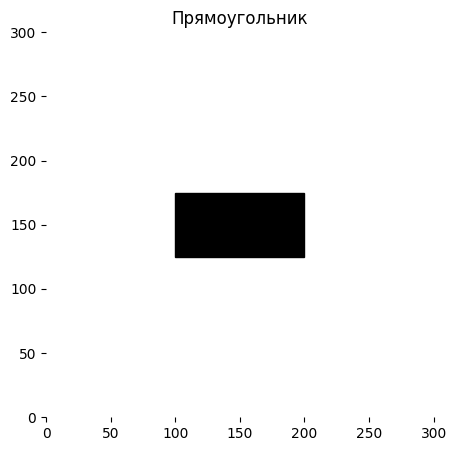

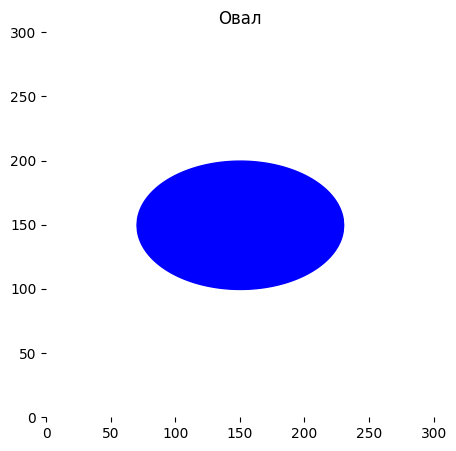

In [111]:
def draw_rectangle(m, n, a, b, bg_color, rect_color):

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    ax.set_facecolor(bg_color)

    x0 = (n - a) / 2
    y0 = (m - b) / 2
    rect_x = [x0, x0 + a, x0 + a, x0, x0]
    rect_y = [y0, y0, y0 + b, y0 + b, y0]

    plt.fill(rect_x, rect_y, color=rect_color)
    ax.set_title('Прямоугольник')
    ax.set_frame_on(False)
    plt.show()

def draw_oval(m, n, a, b, bg_color, oval_color):

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    ax.set_facecolor(bg_color)
    x0, y0 = n / 2, m / 2

    x = np.linspace(x0 - a, x0 + a, 400)
    y_top = y0 + b * np.sqrt(1 - ((x - x0) ** 2) / a**2)
    y_bottom = y0 - b * np.sqrt(1 - ((x - x0) ** 2) / a**2)
    ax.set_title('Овал')
    plt.fill_between(x, y_bottom, y_top, color=oval_color)
    ax.set_frame_on(False)
    plt.show()


draw_rectangle(300, 300, 100, 50, (1, 1, 1), (0, 0, 0))

draw_oval(300, 300, 80, 50, (0, 0, 0), (0, 0, 1))


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Данные 
[ 0.50702027  0.44962491 -0.9458236  -1.65373454 -1.91648129 -3.51237525
 -4.25140391 -3.59907357 -2.17176821 -2.59120296 -1.83471461 -3.74877468
 -3.08932344 -3.89327185 -3.58592624 -3.83367865 -2.51326464 -3.38770029
 -2.760094   -3.03960146 -3.19790694 -3.38176083 -4.22743393 -4.2415329
 -4.30418112 -4.06294087 -3.97843573 -3.18044118 -2.25693256 -3.30755588
 -2.43878338 -3.62511981 -3.03726392 -2.41752514 -4.32884203 -4.23586278
 -4.7043589  -5.46312415 -4.11227182 -4.76595096 -5.57232789 -5.49663295
 -4.81104321 -4.95269179 -3.78632125 -3.25534559 -5.43355691 -5.96302387
 -6.52486597 -6.04550501 -8.67032207 -6.12131236 -5.59028627 -5.44140946
 -4.25984175 -1.91618769 -1.04544105 -0.09662795  0.03406207 -0.10746368
 -0.58325913 -1.40937112 -2.09638522 -3.44694118 -3.52281263 -5.20748021
 -5.01656369 -5.05289429 -4.905959   -5.42809057 -2.3512302  -0.9911143
 -2.2356568  -2.00278871 -2.61079485 -3.62527458 -4.96534665 -4.53312996
 -5.21451019 -4.24668417 -3.25290195 -1.87898

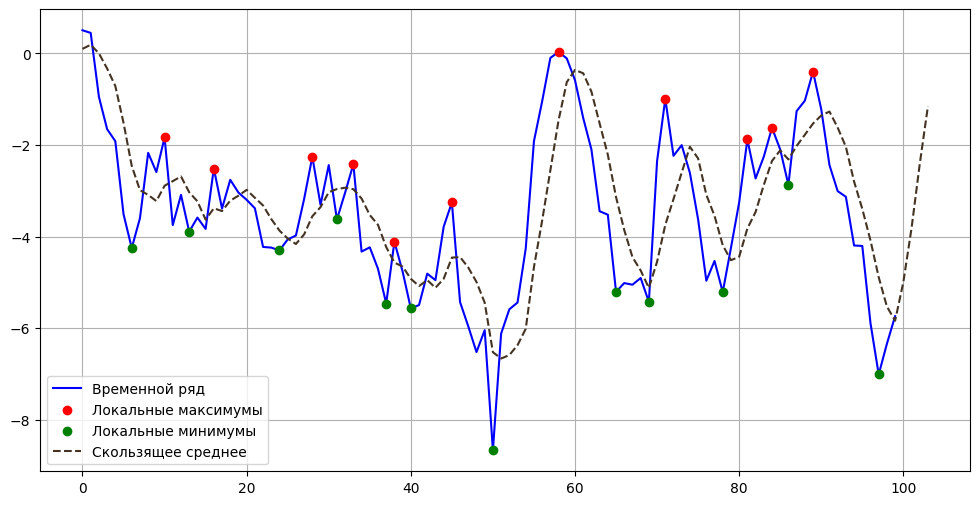

In [161]:
from scipy.signal import argrelextrema

def analyze_time_series(series, window_size):
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)

    local_max = argrelextrema(series, np.greater,order=2)[0]
    local_min = argrelextrema(series, np.less,order=2)[0]

    moving_avg = np.convolve(series, np.ones(window_size) / window_size)

    return mean, variance, std_dev, local_max, local_min, moving_avg

time_series = np.cumsum(np.random.randn(100))
print(f'Данные \n{time_series}')
mean, variance, std_dev, local_max, local_min, moving_avg = analyze_time_series(time_series, window_size =5)

print(f"Дисперсия: {variance:.2f}")
print(f"СКО: {std_dev:.2f}")
print(f"Локальные максимумы: {local_max}")
print(f"Локальные минимумы: {local_min}")

def plot_time_series(series, local_max, local_min, moving_avg):

    plt.figure(figsize=(12, 6))
    plt.plot(series, label="Временной ряд", color="blue")
    plt.scatter(local_max, series[local_max], color="red", label="Локальные максимумы", zorder=3)
    plt.scatter(local_min, series[local_min], color="green", label="Локальные минимумы", zorder=3)

    plt.plot(range(len(moving_avg)), moving_avg, color="#432", linestyle="dashed", label="Скользящее среднее")

    plt.legend()
    plt.grid()
    plt.show()

plot_time_series(time_series, local_max, local_min, moving_avg)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [167]:
import numpy as np

def one_hot_encode(labels):

    labels = np.array(labels)
    num_classes = np.max(labels) + 1
    one_hot = np.eye(num_classes)[labels]
    return one_hot

labels = [0, 2, 3, 0]
one_hot = one_hot_encode(labels)

print('One-hot encoding:')
print(one_hot)
print('А еще можно сделать с помощью getdummies и sklearn.preprocessing OneHotEncoder \U0001F525')

One-hot encoding:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
А еще можно сделать с помощью getdummies и sklearn.preprocessing OneHotEncoder 🔥
